<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB
     Actual  Predicted
332       0          0
111       0          0
352       1          1
205       0          1
56        0          0
379       1          1
81        0          0
214       0          1
142       0          0
110       0          0
119       0          0
172       0          0
373       1          1
274       1          1
24        1          0
276       0          0
78        0          0
65        0          0
43        0          0
339       1          1
47        0          0
105       0          0
351       0          0
280       1          1


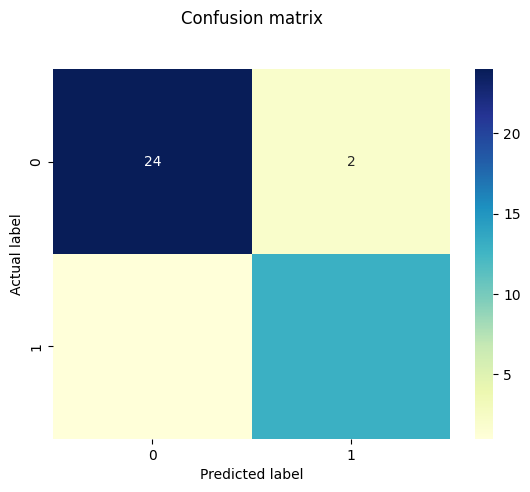

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

social_N_data = pd.read_csv('Social_Network_Ads.csv')
pd.concat([social_N_data.head(), social_N_data.tail()])

#CHECK FOR NULL VALUES
social_N_data.isnull().any()

# CLEAN THE DATA
social_N_data.drop('User ID', axis=1, inplace=True)

# CHANGE CATEGORICAL VARIABLE TO DUMMIES
social_N_data.info()
gender = pd.get_dummies(social_N_data['Gender'], drop_first=True)
social_N_data.drop('Gender',axis=1,inplace=True)
social_N_data = pd.concat([social_N_data,gender], axis=1)

# SPLIT DATA TO INDEPENDENT AND DEPENDENT VARIABLES
X = social_N_data.iloc[:,[0,1,3]] # Age, EstimatedSalary and Male
y = social_N_data.iloc[:, 2] # Purchased

# FEATURE SCALING
sc = StandardScaler()
X = sc.fit_transform(X)

# SPLIT DATA TO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10)

# FIT/TRAIN MODEL
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# PREDICTIONS
y_pred = classifier.predict(X_test)
result = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
print(result)

# EVALUATE MODEL
# predic_proba()
# print(classifier.predict_proba(X) # uncheck if needed
#confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix \n', cf_matrix)

sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print('Accuracy of model')
print(accuracy_score(y_test,y_pred) * 100, '%')
#0.8083333333333333

# classification report
target_names = ['will NOT PURCHASE', 'will PURCHASE']
print('Classification report: \n', classification_report(y_test, y_pred,target_names=target_names))